<a href="https://colab.research.google.com/github/Khushi-Raj-Das/SHM/blob/main/New_Localisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nouraaly/xbd-data

Dataset URL: https://www.kaggle.com/datasets/nouraaly/xbd-data
License(s): unknown
 99% 1.20G/1.22G [00:12<00:00, 137MB/s]
100% 1.22G/1.22G [00:12<00:00, 105MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/xbd-data.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os

# Path where the dataset is extracted
data_dir = "/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy"  # Adjust this path if needed

# List the contents of the directory
print(os.listdir(data_dir))

['val_post_image_chips_0.npy', 'val_pre_image_chips_0.npy', 'train_dmg_mask_chips_0.npy', 'train_pre_img_tile_chips_0.npy', 'val_dmg_mask_chips_0.npy', 'val_pre_img_tile_chips_0.npy', 'train_post_image_chips_0.npy', 'train_pre_image_chips_0.npy', 'train_bld_mask_chips_0.npy', 'val_bld_mask_chips_0.npy']


In [ ]:
import numpy as np


batch_size = 32

# Function to load data in batches
def load_data_in_batches(data_paths, batch_size=100):
    all_data = []
    for path in data_paths:
        # Load each data chunk in batches
        data = np.load(path)
        for i in range(0, len(data), batch_size):
            all_data.append(data[i:i + batch_size])
    return all_data


data_paths = [
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/train_pre_image_chips_0.npy',   # Train pre-disaster images
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/train_post_image_chips_0.npy',  # Train post-disaster images
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/train_bld_mask_chips_0.npy',    # Train building masks
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/train_dmg_mask_chips_0.npy',    # Train damage masks
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/train_pre_img_tile_chips_0.npy', # Train image tile chips

    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/val_pre_image_chips_0.npy',     # Validation pre-disaster images
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/val_post_image_chips_0.npy',    # Validation post-disaster images
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/val_bld_mask_chips_0.npy',      # Validation building masks
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/val_dmg_mask_chips_0.npy',      # Validation damage masks
    '/content/sample_xBD_sliced_augmented_20_alldisasters_final_mdl_npy/val_pre_img_tile_chips_0.npy',  # Validation image tile chips
]


num_train_batches = 5
num_val_batches = 2


train_pre_images = load_data_in_batches([data_paths[0]], batch_size)[:num_train_batches]
train_post_images = load_data_in_batches([data_paths[1]], batch_size)[:num_train_batches]
train_bld_masks = load_data_in_batches([data_paths[2]], batch_size)[:num_train_batches]
train_dmg_masks = load_data_in_batches([data_paths[3]], batch_size)[:num_train_batches]
train_tile_chips = load_data_in_batches([data_paths[4]], batch_size)[:num_train_batches]

val_pre_images = load_data_in_batches([data_paths[5]], batch_size)[:num_val_batches]
val_post_images = load_data_in_batches([data_paths[6]], batch_size)[:num_val_batches]
val_bld_masks = load_data_in_batches([data_paths[7]], batch_size)[:num_val_batches]
val_dmg_masks = load_data_in_batches([data_paths[8]], batch_size)[:num_val_batches]
val_tile_chips = load_data_in_batches([data_paths[9]], batch_size)[:num_val_batches]


print(f"Loaded {len(train_pre_images)} batches of train pre-disaster images.")
print(f"Loaded {len(train_post_images)} batches of train post-disaster images.")
print(f"Loaded {len(train_bld_masks)} batches of train building masks.")
print(f"Loaded {len(train_dmg_masks)} batches of train damage masks.")
print(f"Loaded {len(train_tile_chips)} batches of train image tile chips.")

print(f"Loaded {len(val_pre_images)} batches of validation pre-disaster images.")
print(f"Loaded {len(val_post_images)} batches of validation post-disaster images.")
print(f"Loaded {len(val_bld_masks)} batches of validation building masks.")
print(f"Loaded {len(val_dmg_masks)} batches of validation damage masks.")
print(f"Loaded {len(val_tile_chips)} batches of validation image tile chips.")

Loaded 5 batches of train pre-disaster images.
Loaded 5 batches of train post-disaster images.
Loaded 5 batches of train building masks.
Loaded 5 batches of train damage masks.
Loaded 5 batches of train image tile chips.
Loaded 2 batches of validation pre-disaster images.
Loaded 2 batches of validation post-disaster images.
Loaded 2 batches of validation building masks.
Loaded 2 batches of validation damage masks.
Loaded 2 batches of validation image tile chips.


In [ ]:
import numpy as np


def check_unique_categories(masks):
    unique_categories = set()
    for mask_batch in masks:
        for mask in mask_batch:
            unique_categories.update(np.unique(mask))
    return unique_categories


train_unique_categories_bld = check_unique_categories(train_bld_masks)
print(f"Unique categories in training building masks: {train_unique_categories_bld}")


train_unique_categories_dmg = check_unique_categories(train_dmg_masks)
print(f"Unique categories in training damage masks: {train_unique_categories_dmg}")


val_unique_categories_bld = check_unique_categories(val_bld_masks)
print(f"Unique categories in validation building masks: {val_unique_categories_bld}")


val_unique_categories_dmg = check_unique_categories(val_dmg_masks)
print(f"Unique categories in validation damage masks: {val_unique_categories_dmg}")


Unique categories in training building masks: {0, 1}
Unique categories in training damage masks: {0, 1, 2, 3, 4, 5}
Unique categories in validation building masks: {0, 1}
Unique categories in validation damage masks: {0, 1, 2, 3, 4}


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

def preprocess_data(images, masks, num_classes, target_size=(128, 128)):
    all_images = []
    all_masks = []

    for batch in range(len(images)):
        for i in range(images[batch].shape[0]):

            image = cv2.resize(images[batch][i], target_size)
            all_images.append(image.astype('float32') / 255.0)


            mask = cv2.resize(masks[batch][i], target_size)
            mask_categorical = to_categorical(mask, num_classes=num_classes)
            all_masks.append(mask_categorical)

    return np.array(all_images), np.array(all_masks)


train_pre_images, train_bld_masks = preprocess_data(train_pre_images, train_bld_masks, num_classes=2)
val_pre_images, val_bld_masks = preprocess_data(val_pre_images, val_bld_masks, num_classes=2)

**FCN(Fully Connected Network) Architecture**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Activation
from tensorflow.keras.optimizers import Adam


def build_fcn(input_shape=(128, 128, 3), num_classes=2):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Decoder
    up1 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv4)
    concat1 = concatenate([up1, conv3])
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(concat1)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv5)
    concat2 = concatenate([up2, conv2])
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat2)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv6)
    concat3 = concatenate([up3, conv1])
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat3)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(conv7)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

fcn_model = build_fcn(input_shape=(128, 128, 3), num_classes=2)
fcn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 32, 32, 256)    │        524,544 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 32, 512)    │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 256)    │      1,179,904 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 64, 64, 128)    │        131,200 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)    

 Total params: 7,697,410 (29.36 MB)

 Trainable params: 7,697,410 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

epochs = 50
batch_size = 32


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')


history = fcn_model.fit(
    train_pre_images,
    train_bld_masks,
    validation_data=(val_pre_images, val_bld_masks),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.9718 - loss: 0.6715 - val_accuracy: 0.9855 - val_loss: 0.6442
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 517ms/step - accuracy: 0.9843 - loss: 0.6252 - val_accuracy: 0.9855 - val_loss: 0.5789
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 0.9808 - loss: 0.5316 - val_accuracy: 0.9855 - val_loss: 0.3447
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - accuracy: 0.9889 - loss: 0.2687 - val_accuracy: 0.9855 - val_loss: 0.1473
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - accuracy: 0.9797 - loss: 0.2775 - val_accuracy: 0.9855 - val_loss: 0.1386
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.9804 - loss: 0.2093 - val_accuracy: 0.9855 - val_loss: 0.1486
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 509ms/step - accuracy: 0.9836 - loss: 0.1911 - val_accuracy: 0.9855 - val_loss: 0.1281
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - accuracy: 0.9820 - loss: 0.1876 - val_accuracy: 0.9855 - val_loss: 

In [ ]:
val_loss, val_accuracy = fcn_model.evaluate(val_pre_images, val_bld_masks)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9859 - loss: 0.0378
Validation Loss: 0.040184542536735535, Validation Accuracy: 0.9854984283447266


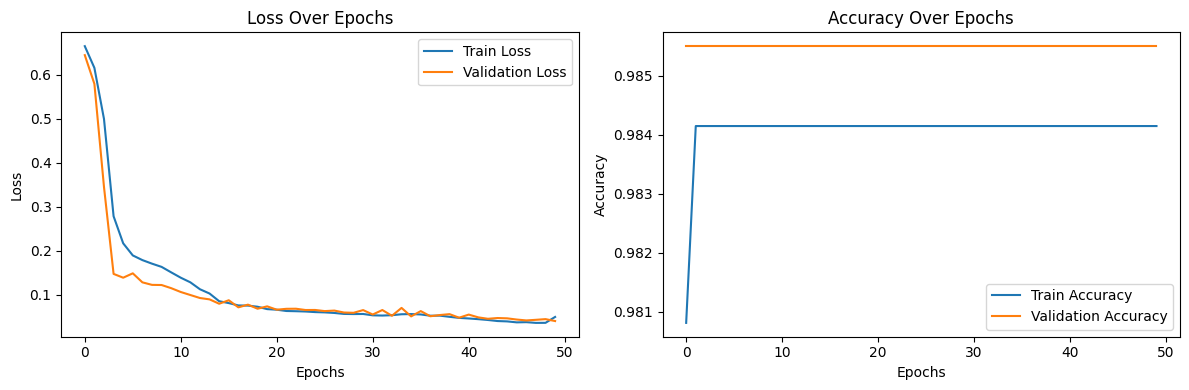

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


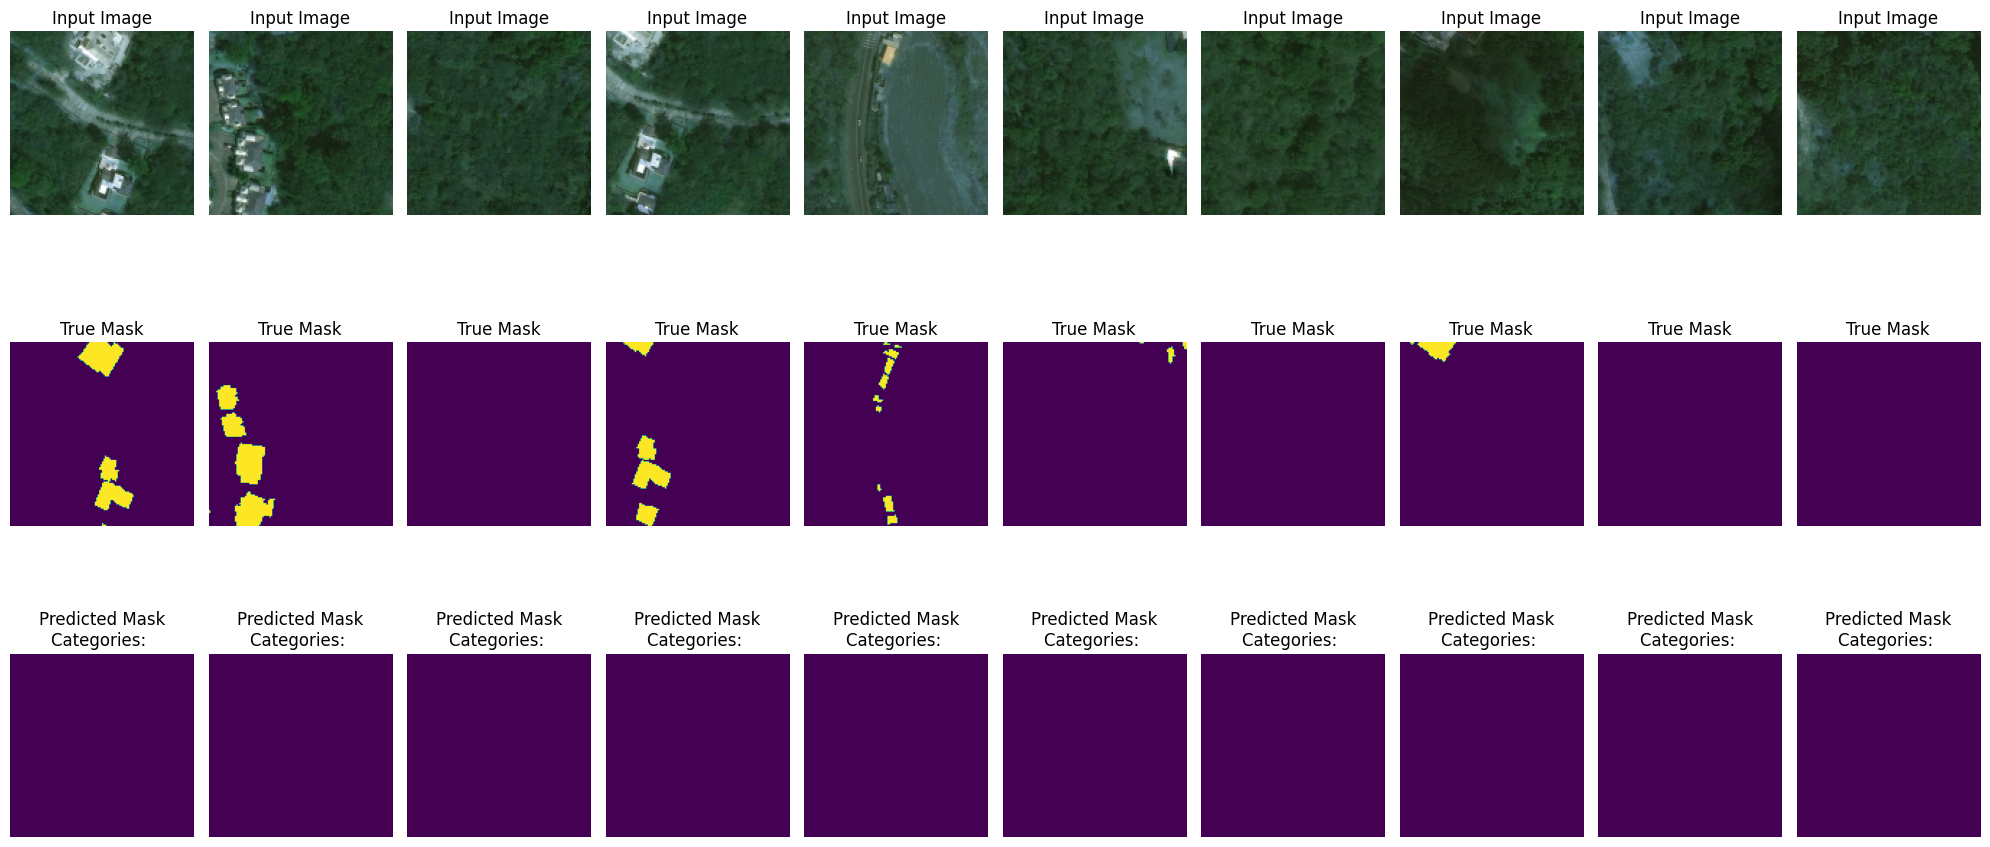

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_random_predictions_fcn(images, true_masks, predicted_masks, num_images=10):
    num_images = min(num_images, len(images))

    random_indices = np.random.choice(len(images), size=num_images, replace=False)

    plt.figure(figsize=(20, 10))
    for i, idx in enumerate(random_indices):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title("Input Image")
        plt.axis("off")

        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(true_masks[idx].argmax(axis=-1))
        plt.title("True Mask")
        plt.axis("off")


        predicted_mask = predicted_masks[idx].argmax(axis=-1)
        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(predicted_mask)

        unique_categories = np.unique(predicted_mask)
        category_labels = ', '.join([f"Class {cat}" for cat in unique_categories if cat > 0])


        plt.title(f"Predicted Mask\nCategories: {category_labels}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


predicted_masks = fcn_model.predict(val_pre_images)

visualize_random_predictions_fcn(val_pre_images, val_bld_masks, predicted_masks, num_images=10)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Test Accuracy: 0.9855
Precision: 0.9712
Recall: 0.9855
F1 Score: 0.9783


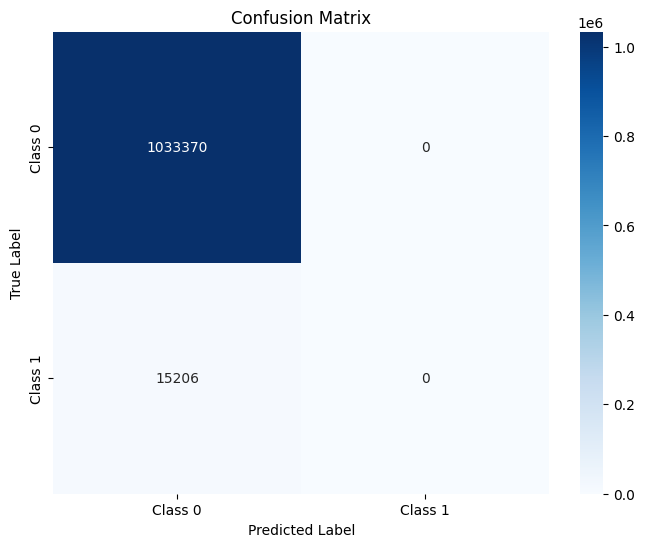

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

predicted_masks = fcn_model.predict(val_pre_images)


predicted_labels = np.argmax(predicted_masks, axis=-1)
true_labels = np.argmax(val_bld_masks, axis=-1)


true_labels_flat = true_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()


cm = confusion_matrix(true_labels_flat, predicted_labels_flat)


accuracy = accuracy_score(true_labels_flat, predicted_labels_flat)
precision = precision_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)
recall = recall_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)
f1 = f1_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(cm)

**UNET ARCHITECTURE**

In [ ]:
from tensorflow.keras import layers, models

def unet_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Downsampling
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Upsampling
    u4 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model


input_shape = (128, 128, 3)
num_classes = 2
model = unet_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 128, 128, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 64, 64, 32)     │              0 │ conv2d_16[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 64, 64, 64)     │         36,928 │ conv2d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 32, 32, 64)     │              0 │ conv2d_18[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 32, 32, 128)    │        147,584 │ conv2d_19[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_3        │ (None, 64, 64, 64)     │         32,832 │ conv2d_20[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 64, 64, 128)    │              0 │ conv2d_transpose_3[0]… │
│ (Concatenate)             │                        │                │ conv2d_18[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 64, 64, 64)     │         73,792 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 64, 64, 64)     │         36,928 │ conv2d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_4        │ (None, 128, 128, 32)   │          8,224 │ conv2d_22[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 128, 128, 64)   │              0 │ conv2d_transpose_4[0]… │
│ (Concatenate)             │                        │                │ conv2d_16[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 128, 128, 32)   │         18,464 │ concatenate_4[0][0]    │
├──────────────────────

 Total params: 466,562 (1.78 MB)

 Trainable params: 466,562 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_pre_images,
    train_bld_masks,
    validation_data=(val_pre_images, val_bld_masks),
    epochs=50,
    batch_size=32
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9755 - loss: 0.6139 - val_accuracy: 0.9855 - val_loss: 0.1487
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9862 - loss: 0.2684 - val_accuracy: 0.9855 - val_loss: 0.1491
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9869 - loss: 0.1654 - val_accuracy: 0.9855 - val_loss: 0.1319
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9783 - loss: 0.1730 - val_accuracy: 0.9855 - val_loss: 0.1161
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9853 - loss: 0.1289 - val_accuracy: 0.9855 - val_loss: 0.1000
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9775 - loss: 0.1483 - val_accuracy: 0.9855 - val_loss: 0.0995
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9815 - loss: 0.1062 - val_accuracy: 0.9855 - val_loss: 0.0863
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9835 - loss: 0.0892 - val_accuracy: 0.9855 - val_loss: 0

In [ ]:
training_loss, training_accuracy = model.evaluate(train_pre_images, train_bld_masks)
print(f"Training Loss: {training_loss}")
print(f"Training Accuracy: {training_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9905 - loss: 0.0254
Training Loss: 0.025428634136915207
Training Accuracy: 0.9907295107841492


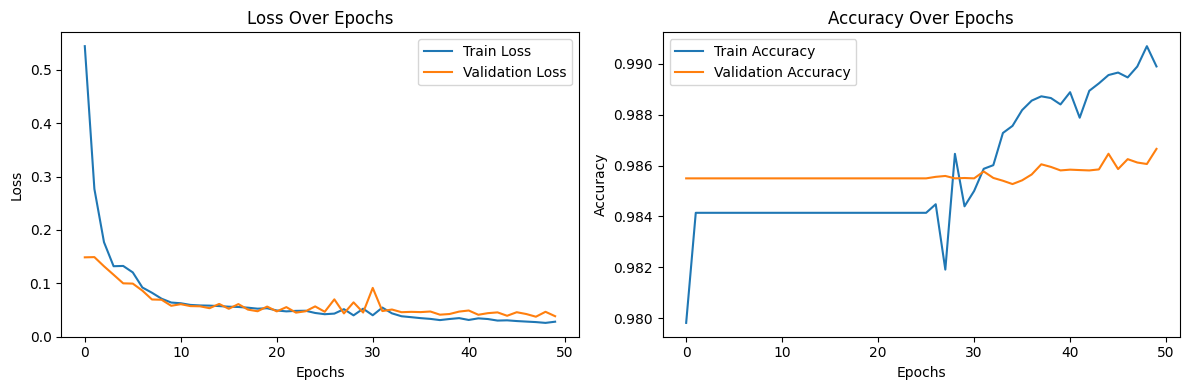

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


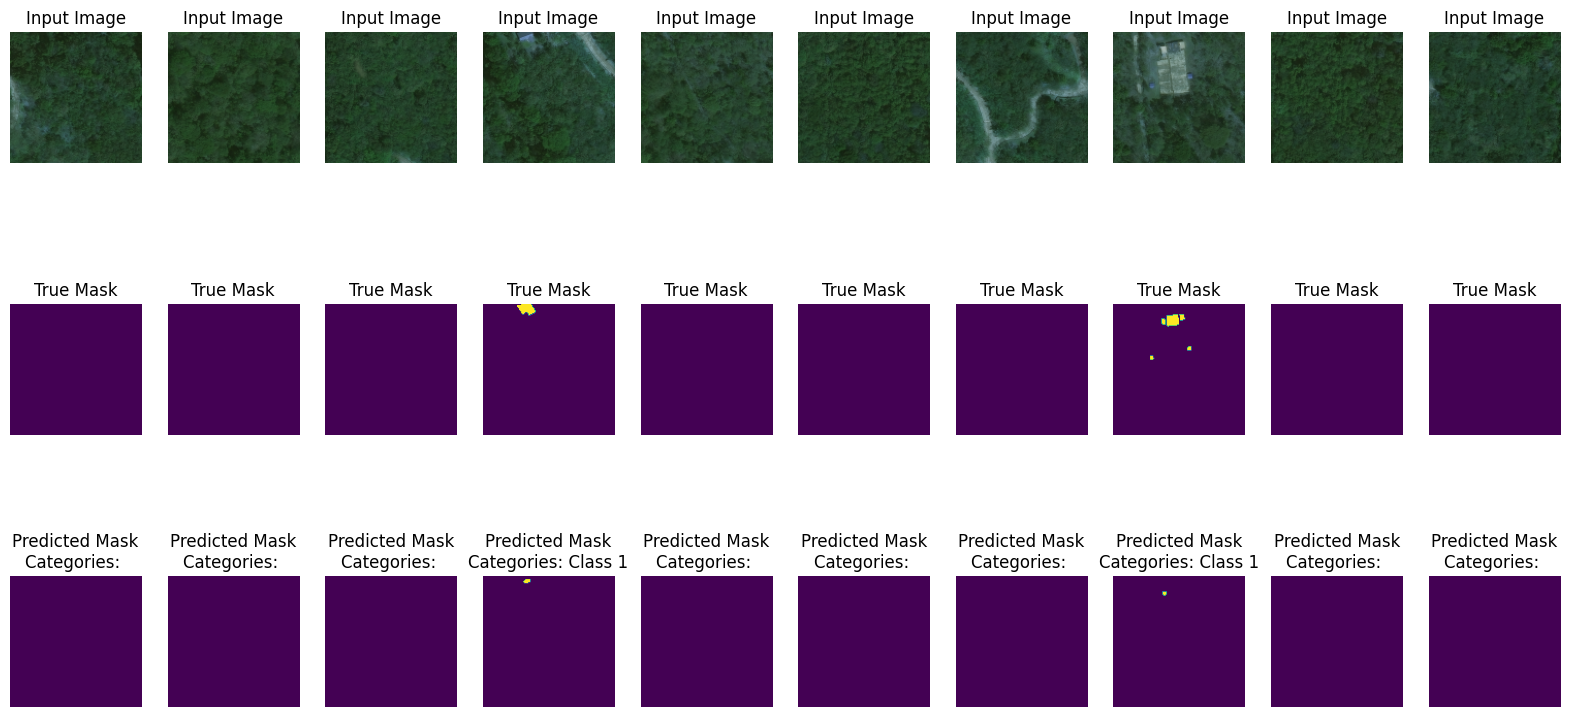

In [ ]:
def visualize_predictions(images, true_masks, predicted_masks, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(images[i])
        plt.title("Input Image")
        plt.axis("off")

        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(true_masks[i].argmax(axis=-1))
        plt.title("True Mask")
        plt.axis("off")

        predicted_mask = predicted_masks[i].argmax(axis=-1)
        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(predicted_mask)


        unique_categories = np.unique(predicted_mask)
        category_labels = ', '.join([f"Class {cat}" for cat in unique_categories if cat > 0])

        plt.title(f"Predicted Mask\nCategories: {category_labels}")
        plt.axis("off")

    plt.show()


predicted_masks = model.predict(val_pre_images)


visualize_predictions(val_pre_images, val_bld_masks, predicted_masks, num_images=10)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Test Accuracy: 0.9867
Precision: 0.9833
Recall: 0.9867
F1 Score: 0.9838


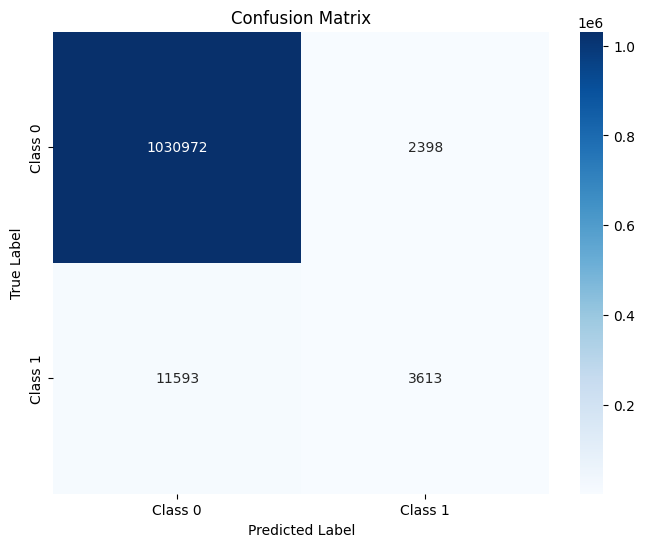

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

predicted_masks = model.predict(val_pre_images)

predicted_labels = np.argmax(predicted_masks, axis=-1)
true_labels = np.argmax(val_bld_masks, axis=-1)

true_labels_flat = true_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

cm = confusion_matrix(true_labels_flat, predicted_labels_flat)

accuracy = accuracy_score(true_labels_flat, predicted_labels_flat)
precision = precision_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)
recall = recall_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)
f1 = f1_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm)

**SegNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def conv_block(input_tensor, num_filters):
    """
    A convolution block consisting of two convolutional layers followed by batch normalization and ReLU activation.
    """
    x = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(num_filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def encoder_block(input_tensor, num_filters):
    """
    Encoder block with convolutional operations followed by max pooling.
    """
    conv = conv_block(input_tensor, num_filters)
    pool = layers.MaxPooling2D((2, 2))(conv)
    return conv, pool

def decoder_block(input_tensor, skip_tensor, num_filters):
    """
    Decoder block that upsamples the input tensor and concatenates it with the corresponding encoder output.
    """
    upsample = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    concat = layers.concatenate([upsample, skip_tensor])
    conv = conv_block(concat, num_filters)
    return conv

def build_resunet(input_shape=(128, 128, 3), num_classes=2):
    """
    Build the ResUNet model for semantic segmentation.

    Args:
        input_shape (tuple): Shape of the input images (height, width, channels).
        num_classes (int): Number of classes for segmentation.

    Returns:
        model (tf.keras.Model): ResUNet model.
    """

    inputs = layers.Input(shape=input_shape)

    # Encoder
    enc1, pool1 = encoder_block(inputs, 64)   # Block 1
    enc2, pool2 = encoder_block(pool1, 128)   # Block 2
    enc3, pool3 = encoder_block(pool2, 256)   # Block 3
    enc4, pool4 = encoder_block(pool3, 512)   # Block 4

    # Bottleneck
    bottleneck = conv_block(pool4, 1024)

    # Decoder
    dec4 = decoder_block(bottleneck, enc4, 512)
    dec3 = decoder_block(dec4, enc3, 256)
    dec2 = decoder_block(dec3, enc2, 128)
    dec1 = decoder_block(dec2, enc1, 64)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(dec1)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

resunet_model = build_resunet(input_shape=(128, 128, 3), num_classes=10)
resunet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])

resunet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 128, 128, 64)   │          1,792 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 64)   │            256 │ conv2d_28[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 64)   │            256 │ conv2d_29[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 128, 128, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 64, 64, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 128)    │            512 │ conv2d_30[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 64, 64, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 64, 64, 128)    │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 128)    │            512 │ conv2d_31[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 64, 64, 128)    │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 32, 32, 128)    │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_6[0][0]  │
├──────────────────────

 Total params: 31,055,882 (118.47 MB)

 Trainable params: 31,044,106 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [ ]:
history = model.fit(
    train_pre_images,
    train_bld_masks,
    validation_data=(val_pre_images, val_bld_masks),
    epochs=50,
    batch_size=32
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9861 - val_loss: 0.0369
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9857 - val_loss: 0.0550
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9888 - loss: 0.0345 - val_accuracy: 0.9858 - val_loss: 0.0405
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9889 - loss: 0.0323 - val_accuracy: 0.9857 - val_loss: 0.0477
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9861 - loss: 0.0370 - val_accuracy: 0.9865 - val_loss: 0.0382
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.9886 - loss: 0.0304 - val_accuracy: 0.9863 - val_loss: 0.0490
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9905 - loss: 0.0270 - val_accuracy: 0.9867 - val_loss: 0.0381
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9913 - loss: 0.0256 - val_accuracy: 0.9861 - val_loss:

In [ ]:
training_loss, training_accuracy = model.evaluate(train_pre_images, train_bld_masks)
print(f"Training Loss: {training_loss}")
print(f"Training Accuracy: {training_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9958 - loss: 0.0124
Training Loss: 0.012867887504398823
Training Accuracy: 0.9956096410751343


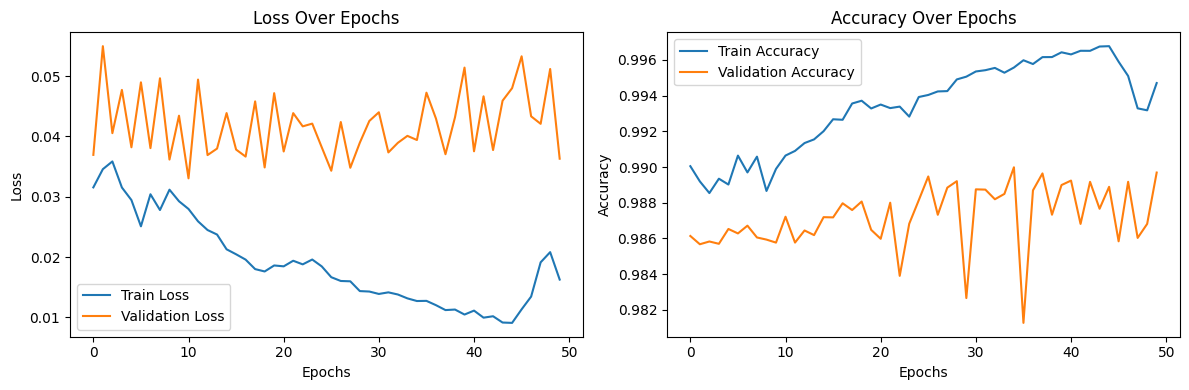

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Test Accuracy: 0.0000
Precision: 0.6159
Recall: 0.0000
F1 Score: 0.0000


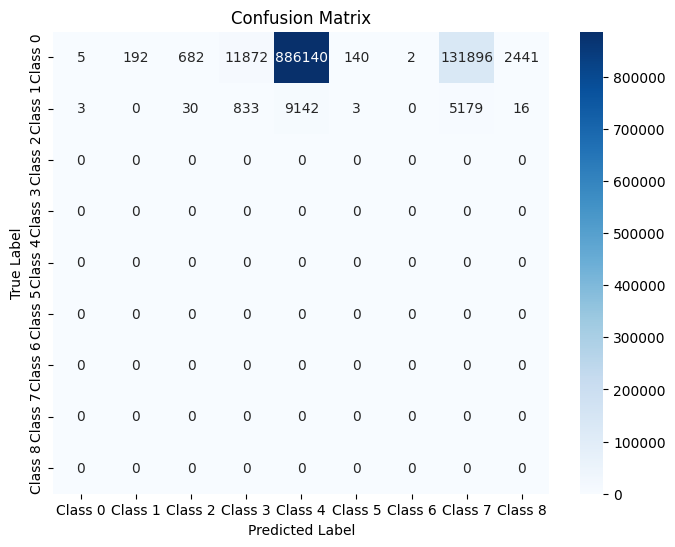

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

predicted_masks = resunet_model.predict(val_pre_images)

predicted_labels = np.argmax(predicted_masks, axis=-1)
true_labels = np.argmax(val_bld_masks, axis=-1)

true_labels_flat = true_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

cm = confusion_matrix(true_labels_flat, predicted_labels_flat)

accuracy = accuracy_score(true_labels_flat, predicted_labels_flat)
precision = precision_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)
recall = recall_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)
f1 = f1_score(true_labels_flat, predicted_labels_flat, average='weighted', zero_division=0)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm)